# Tekstbestanden lezen en schrijven

## Overzicht

Veel data waarmee we werken is opgeslagen in een excel-bestand of in tekst bestanden. Door zulke bestanden in Python te openen kun je er heel efficient bewerkingen op toepassen en figuren maken. In dit deel zullen we enkele voorbeelden zien van het openen van zulke bestanden en ook hoe je je resultaten zelf ook kan opslaan in een nieuw excel of tekst bestand.

# Tekstbestanden lezen

Er zijn meerdere functies in Python die je kan gebruiken om tekstbestanden te openen en de data erin te lezen. Het is niet de bedoeling om die allemaal in detail te gaan bespreken, dus we beperken ons tot een van de functies, namelijk de `loadtxt` functie die beschikbaar is in de `numpy module`. Andere functies zijn readline() die standaard beschikbaar is in Python en genfromtxt() uit de numpy module.

Om een eerste indruk te krijgen van de vele mogelijkheden van de `loadtxt` functie gaan we de help aanroepen. Zoals je zult zien zijn er allerlei opties beschreven. Verder is het heel handig dat er aan het einde allerlei voorbeelden gegeven worden.

In [12]:
import numpy as np
help(np.loadtxt)

Help on function loadtxt in module numpy:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None, *, quotechar=None, like=None)
    Load data from a text file.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is ``.gz`` or ``.bz2``, the file is first decompressed. Note
        that generators must return bytes or strings. The strings
        in a list or produced by a generator are treated as lines.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type

Ter illustratie zullen we gaan werken met een bestand "deBilt_yearly_temperatures.txt" dat in de map 'Media' is opgeslagen en waarin jaargemiddelde oppervlakte temperaturen uit de Bilt staan voor de periode 1901 tot 1990. Deze zijn verkregen via de Climate Explorer van het KNMI: https://climexp.knmi.nl/start.cgi.

Zoals gezegd openen we dit bestand met de `loadtxt` functie uit de `numpy module`. Op de eerste 27 regels van het bestand staat allerlei achtergrondinformatie, zogenaamde `meta data`. Je kunt het bestand bekijken door naar de map Media te gaan en vervolgens dubbel te klikken op het bestand. Deze meta data willen we niet openen dus we moeten de functie vertellen om deze regels over te slaan. Dit kan ofwel door gebruik te maken van de functie optie `skiprows` of door aan te geven hoe deze 'comments' in het bestand zijn gemarkeerd (in ons geval met een '#'). Beide opties staan hieronder uitgewerkt.

In [8]:
import numpy as np
debilt_data = np.loadtxt('Media/deBilt_yearly_temperatures.txt',skiprows=27)

array([[1901.      ,    8.903205],
       [1902.      ,    8.92253 ],
       [1903.      ,    8.93362 ],
       [1904.      ,    8.962243],
       [1905.      ,    8.984967],
       [1906.      ,    9.002845],
       [1907.      ,    9.030684],
       [1908.      ,    9.061136],
       [1909.      ,    9.061813],
       [1910.      ,    9.028958],
       [1911.      ,    8.978573],
       [1912.      ,    8.978765],
       [1913.      ,    8.976768],
       [1914.      ,    8.973549],
       [1915.      ,    8.987822],
       [1916.      ,    8.986124],
       [1917.      ,    9.031549],
       [1918.      ,    9.053846],
       [1919.      ,    9.091194],
       [1920.      ,    9.092023],
       [1921.      ,    9.099168],
       [1922.      ,    9.111775],
       [1923.      ,    9.135405],
       [1924.      ,    9.145616],
       [1925.      ,    9.124907],
       [1926.      ,    9.125786],
       [1927.      ,    9.136966],
       [1928.      ,    9.178061],
       [1929.      ,

In [1]:
import numpy as np
debilt_data = np.loadtxt('Media/deBilt_yearly_temperatures.txt',comments='#')

Als je de variabele 'debilt_data' vervolgens bekijkt zul je zien dat het type 'ndarray' is (een numpy array). Meer over `numpy arrays` volgt later in deze cursus.

Alle data die we zojuist hebben ingelezen, zowel de jaren als de bijbehorende temperaturen, staan nu in de variabele debilt_data. Je kunt `np.loadtxt` de data uit de twee kolommen ook direct in twee aparte variabelen laten zetten, bijvoorbeeld een variabele 'jaar' en een andere 'temp', door de optie `unpack=True` toe te voegen.

In [13]:
import numpy as np
jaar, temp = np.loadtxt('Media/deBilt_yearly_temperatures.txt',comments='#',unpack=True)

Deze data kun je nu weergeven in bijvoorbeeld een grafiek, waarover later meer.

Text(0, 0.5, 'Jaargemiddelde temperatuur in de Bilt [C]')

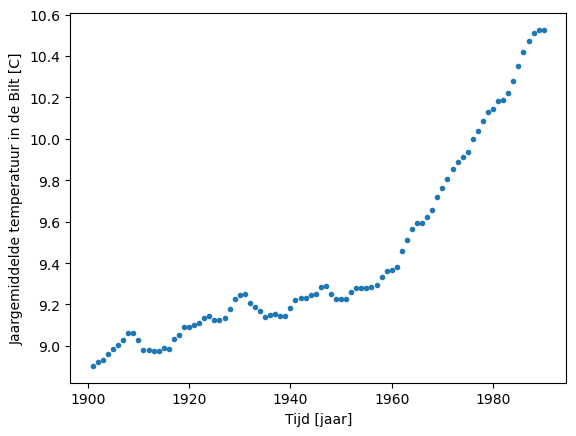

In [11]:
import matplotlib.pyplot as plt

plt.plot(jaar,temp,'.')
plt.xlabel('Tijd [jaar]')
plt.ylabel('Jaargemiddelde temperatuur in de Bilt [C]')

# Tekstbestanden schrijven

Voor het schrijven van je data naar een tekstbestand kun je wederom verschillende functies gebruiken, maar wij zullen hier enkel kijken naar de `numpy` `savetxt` functie.

Stel we willen enkele jaren toevoegen aan de lijst met temperatuurwaarnemingen uit de Bilt en de variabelen vervolgens opslaan, dan kunnen we iets doen zoals hieronder. Je hoeft niet alle details hieronder te begrijpen.

In [44]:
import numpy as np

jaar_nieuw = np.append(jaar,[1991,1992,1993])   # Voeg drie jaartallen toe aan 'jaar' en geef deze variabele een nieuwe naam
temp_nieuw = np.append(temp,[10.6088790011, 10.6600998117, 10.884])   # Voeg drie jaartallen toe aan 'temp' en geef deze variabele een nieuwe naam

outfile = 'Media/deBilt_yearly_temperatures_nieuw.txt' # naam van nieuwe tekstbestand
outvar =np.column_stack([jaar_nieuw, temp_nieuw])      # Maak een nieuwe variabele waarin de twee variabelen die we willen wegschrijven als kolommen naast elkaar staan 
formatting = ['%.0f','%.6f']                           # Geef aan dat de 'jaren' in de eerste kolom geen decimalen hebben, en de temperaturen in de tweede kolom zes decimalen hebben
np.savetxt(outfile,outvar ,fmt=formatting,delimiter='\t')   # Schrijf het nieuwe tekstbestand (gebruik een 'tab' als scheidingsteken (\t))

Kijk in de map 'Media' of je inderdaad een nieuw tekstbestand hebt geschreven en of dit er uitziet zoals de bedoeling is.

# Excel-bestanden lezen

Voor het lezen van excel bestanden maken we gebruik van de `read_excel functie` uit de `pandas module`. Meer informatie over de pandas module volgt later in deze cursus. Voor dit voorbeeld gebruiken we dezelfde temperatuur data als hiervoor, maar nu openenen we het "deBilt_yearly_temperatures.xlsx" bestand in de map 'Media'. Ook bij de `read_excel functie` kun je opties meegeven om bijvoorbeeld aan te geven welke regels er overgeslagen moeten worden (comment='#').

In [1]:
import pandas as pd 
nogmaals_debilt_data = pd.read_excel("Media/deBilt_yearly_temperatures.xlsx",comment='#')
print(nogmaals_debilt_data)

    Jaar  Temperatuur
0   1901     8.903205
1   1902     8.922530
2   1903     8.933620
3   1904     8.962243
4   1905     8.984967
..   ...          ...
85  1986    10.416760
86  1987    10.473020
87  1988    10.508630
88  1989    10.525710
89  1990    10.523890

[90 rows x 2 columns]


# Excel-bestanden schrijven

Om een excel bestand te schrijven, is het het makkelijkste om te werken met een `dictionary`. In het voorbeeld hieronder schrijven we een dictionary met daarin de vijf landen met de grootste bevolking.  

In [2]:
data_out = pd.DataFrame({'Landen':['India', 'China', 'VS','Indonesie','Pakistan'],
    'Bevolking':['1450935791', '1419321278', '345426571','283487931','251269164']}) # Maak een dictionary aan
outvar = 'Media/Landen_bevolking.xlsx'   # Geef naam en pad voor het te schrijven bestand
data_out.to_excel(outvar)                # Schrijf de variabele 'data_out' naar bestand 'outvar'

## Samenvatting

In dit deel heb je kort enkele voorbeelden gezien van hoe je zowel tekstbestanden (.txt) als excel-bestanden kan lezen en schrijven in Python. Er zijn ook in dit geval zeker meerdere mogelijkheden om deze operaties uit te voeren en welke het handigste is dat is per geval verschillend. Ook hebben de functies die we besproken hebben een heel aantal functies die je kunnen helpen om op een goede manier data te lezen en schrijven. Gebruik voor meer informatie hiervoor vooral de hulp functies en kijk goed naar de vele voorbeelden die er online te vinden zijn.

<!-- Links -->
[Python_FigurenMaken]: 06_Python_Figuren.ipynb

# Ga naar het volgende deel: [06_Python_Figuren][Python_FigurenMaken]